In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('C:/Users/Intel/Desktop/Big_mart.csv')

In [2]:
#Print first five rows and correspondingly all columns form the dataset
print(df.head())

  Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier

In [3]:
#Print shape of the dataset
print(df.shape)

(8523, 12)


In [4]:
#Print size of the dataset
print(df.size)

102276


In [5]:
#Print structure of dataset
print(df.describe(include='all'))

       Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
count             8523  7060.000000             8523      8523.000000   
unique            1559          NaN                5              NaN   
top              FDW13          NaN          Low Fat              NaN   
freq                10          NaN             5089              NaN   
mean               NaN    12.857645              NaN         0.066132   
std                NaN     4.643456              NaN         0.051598   
min                NaN     4.555000              NaN         0.000000   
25%                NaN     8.773750              NaN         0.026989   
50%                NaN    12.600000              NaN         0.053931   
75%                NaN    16.850000              NaN         0.094585   
max                NaN    21.350000              NaN         0.328391   

                    Item_Type     Item_MRP Outlet_Identifier  \
count                    8523  8523.000000              852

In [6]:
print(df.isnull().sum())

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


In [7]:
#Since, there are many null values in Item_Weight and Outlet_size so we have to manage these null values

list(df.columns)

['Item_Identifier',
 'Item_Weight',
 'Item_Fat_Content',
 'Item_Visibility',
 'Item_Type',
 'Item_MRP',
 'Outlet_Identifier',
 'Outlet_Establishment_Year',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type',
 'Item_Outlet_Sales']

In [8]:
#Let's check the frequency of every attribute
categorical_columns = [x for x in df.dtypes.index if df.dtypes[x]=='object']
categorical_columns = [x for x in categorical_columns if x not in ['Item_Identifier','Outlet_Identifier']]
for col in categorical_columns:
    print ('\nFrequency of Categories for %s'%col)
    print (df[col].value_counts())


Frequency of Categories for Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Frequency of Categories for Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Frequency of Categories for Outlet_Size
Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

Frequency of Categories for Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

Frequency of Categories for Outle

In [9]:
#Filling the column Item_weight with its mean   
df['Item_Weight'] = df['Item_Weight'].fillna((df['Item_Weight'].mean()))

In [10]:
#Filling the column Outlet_size with missing

outletSizeMode = {}
for i in set(df['Outlet_Type']):
  outletSizeMode[i] = df[df['Outlet_Type'] == i]['Outlet_Size'].mode()[0]
print(outletSizeMode)
miss_bool = df['Outlet_Size'].isnull()
print ('\nOrignal missing value in Outlet_Size: %d'% sum(miss_bool))
df.loc[miss_bool,'Outlet_Size'] = df.loc[miss_bool,'Outlet_Type'].apply(lambda x: outletSizeMode[x])
print ("New missing value count in Outlet_Size:",sum(df['Outlet_Size'].isnull()))

{'Supermarket Type2': 'Medium', 'Supermarket Type1': 'Small', 'Supermarket Type3': 'Medium', 'Grocery Store': 'Small'}

Orignal missing value in Outlet_Size: 2410
New missing value count in Outlet_Size: 0


In [11]:
print(df.isnull().sum())

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64


In [12]:
'''
Now we have fullfilled all the null value
Now let's correct the mis-coded values(i.e Some of ‘Low Fat’ values mis-coded as ‘low fat’ and ‘LF’ and some of ‘Regular’ are mentioned as ‘regular’ and 'reg'.)
'''
df['Item_Fat_Content']=df['Item_Fat_Content'].replace({'LF': 'Low Fat'}, regex=True)
df['Item_Fat_Content']=df['Item_Fat_Content'].replace({'low fat': 'Low Fat'}, regex=True)
df['Item_Fat_Content']=df['Item_Fat_Content'].replace({'reg': 'Regular'}, regex=True)
df['Item_Fat_Content']=df['Item_Fat_Content'].replace({'regular': 'Regular'}, regex=True)

In [13]:
#Since, now we have cleaned out dataset, it's time to prepare the EDA report

'''
    Objective:
        Our project is to perform data cleaning, make an Exploratory Data Analysis report, visualize distributions 
        and correlation of features, build a linear regression model taking the selected features through feature engineering and 
        predict the item_outlet_sales for the test data.
        
    Description of data:
        There are 8523 rows and 12 columns and total number of dataset are 102276. 
        There are many samples of item to predict the item_outlet_sales.
    
    Attribute Information:
        The list of information on whose basis we will predict the item_outlet_sales are:
            Item_Weight
            Item_Fat_Content
            Item_Visibility
            Item_Type
            Item_MRP
            Outlet_Identifier
            Outlet_Establishment_Year
            Outlet_Size
            Outlet_Location_Type
            Outlet_Type
            Item_Outlet_Sales
            Item_Identifier
'''

'\n    Objective:\n        Our project is to perform data cleaning, make an Exploratory Data Analysis report, visualize distributions \n        and correlation of features, build a linear regression model taking the selected features through feature engineering and \n        predict the item_outlet_sales for the test data.\n        \n    Description of data:\n        There are 8523 rows and 12 columns and total number of dataset are 102276. \n        There are many samples of item to predict the item_outlet_sales.\n    \n    Attribute Information:\n        The list of information on whose basis we will predict the item_outlet_sales are:\n            Item_Weight\n            Item_Fat_Content\n            Item_Visibility\n            Item_Type\n            Item_MRP\n            Outlet_Identifier\n            Outlet_Establishment_Year\n            Outlet_Size\n            Outlet_Location_Type\n            Outlet_Type\n            Item_Outlet_Sales\n            Item_Identifier\n'

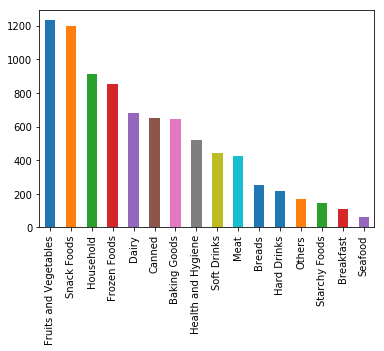

In [14]:
#For better visualization I will take both numerical and categorical approach

                                  #NUMERICAL APPROACH

'''
UNIVARIANTE ANALYSIS

Here we will analyse every variable one by one
'''

df['Item_Type'].value_counts().plot.bar()

In [15]:
print("Observations:\n\t\t\n\t-Major items are Fruits and vegetable, snack, household, dairy,canned and baking goods\n\t-There are very less breakfast, starchy and seafood items Displot of Item_Visibility")

Observations:
		
	-Major items are Fruits and vegetable, snack, household, dairy,canned and baking goods
	-There are very less breakfast, starchy and seafood items Displot of Item_Visibility


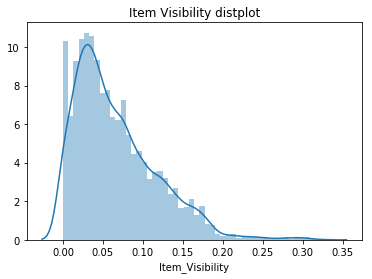

In [16]:
sns.distplot(df['Item_Visibility'])
plt.title("Item Visibility distplot")
plt.show()

In [17]:
print("Observations:\n\t-Most of the product have visibility less than .20\n\t-The graph is having skewness and there are some outliers present #Count plot of Outlet Type")

Observations:
	-Most of the product have visibility less than .20
	-The graph is having skewness and there are some outliers present #Count plot of Outlet Type


In [22]:
print("Supermarket type 1 had the most sale")

Supermarket type 1 had the most sale


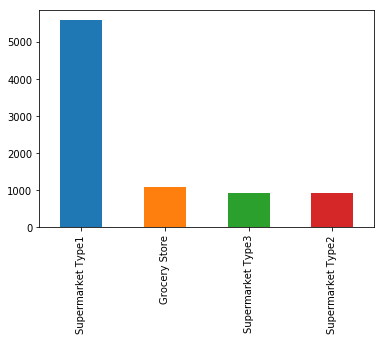

In [21]:
df['Outlet_Type'].value_counts().plot.bar()

In [23]:
print("Observations: Super market type-1 is very large in number. Rest 3 are almost same in number")

Observations: Super market type-1 is very large in number. Rest 3 are almost same in number


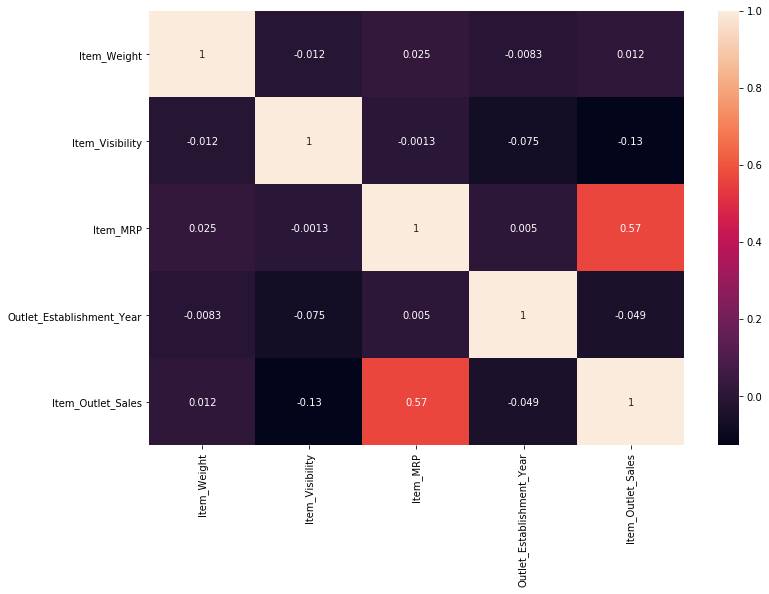

In [24]:
'''
BIVARIATE ANALYSIS
'''

#Numerical
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)

Text(0.5,1,'Sales and Outlet identifier box plot')

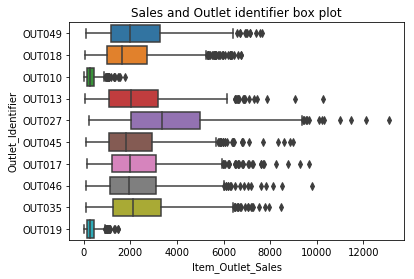

In [26]:
#Box Plot of Outlet_Identifier vs Item_Outlet_Sales
sns.boxplot(y='Outlet_Identifier',x='Item_Outlet_Sales',data=df)
plt.title("Sales and Outlet identifier box plot")

In [27]:
print("Observations: Mostly the outlets sales are between 1000-4000. Also there are some outliers.")

Observations: Mostly the outlets sales are between 1000-4000. Also there are some outliers.


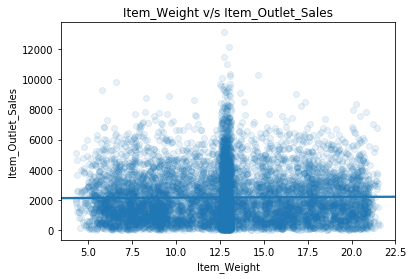

In [28]:
sns.regplot(x='Item_Weight',y='Item_Outlet_Sales',data=df,x_jitter=0.3,scatter_kws={'alpha':0.1})
plt.title("Item_Weight v/s Item_Outlet_Sales")
plt.show()

In [29]:
print("Observations:\n\t-High number of product have weight near 12.5\n\t-Major sales is less than 2000")

Observations:
	-High number of product have weight near 12.5
	-Major sales is less than 2000


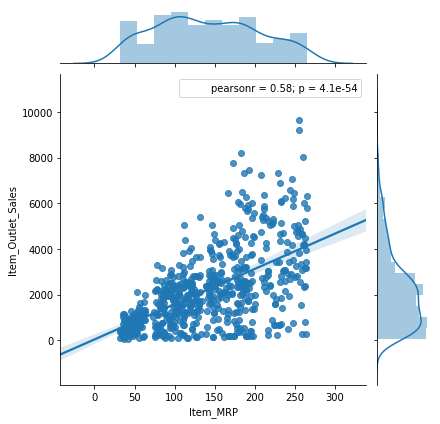

In [31]:
# Lets visualize it with saleprice 
sns.jointplot(x='Item_MRP',y='Item_Outlet_Sales',size=6 ,data = df.sample(600),kind = 'reg')

In [32]:
print("Observation(s): As Mrp increases sales also increases")

Observation(s): As Mrp increases sales also increases


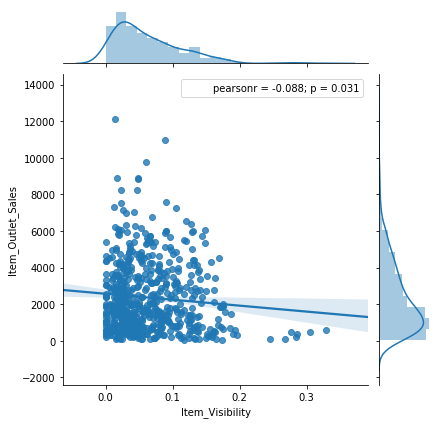

In [33]:
sns.jointplot(x='Item_Visibility',y='Item_Outlet_Sales',size=6,kind='reg',data = df.sample(600))

In [35]:
print("As Visibiltiy % increases sales decreases")

As Visibiltiy % increases sales decreases


C:\Users\Intel\Downloads\WinPython\python-3.6.5.amd64\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Intel\Downloads\WinPython\python-3.6.5.amd64\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in true_divide


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

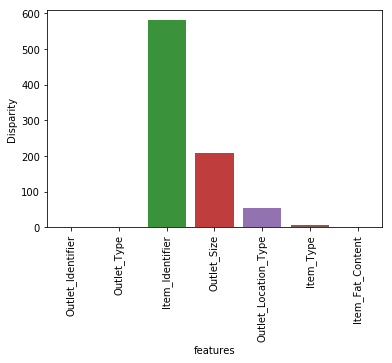

In [36]:
                                                       #CATEGORICAL APPROACH

from scipy import stats
cate = [f for f in df.columns if df.dtypes[f] == 'object']
def anova(frame):
    anv = pd.DataFrame()
    anv['features'] = cate
    pvals = []
    for c in cate:
        samples = []
        for cls in frame[c].unique():
            s = frame[frame[c] == cls]['Item_Outlet_Sales'].values
            samples.append(s)
        pval = stats.f_oneway(*samples)[1]
        pvals.append(pval)
    anv['pval'] = pvals
    return anv.sort_values('pval')
num = df.select_dtypes(exclude ='object')
cat = df.select_dtypes(include ='object')
cat['Item_Outlet_Sales'] = num.Item_Outlet_Sales.values
k = anova(cat)
k['Disparity'] = np.log(1./k['pval'].values)
sns.barplot(data = k,x='features',y='Disparity')
plt.xticks(rotation = 90)    

In [37]:
print("Observation(s): The item_identifier is the one that influences the sale price for outlet followed by location type and size")

Observation(s): The item_identifier is the one that influences the sale price for outlet followed by location type and size


In [39]:
int_features =['Item_MRP','Item_Weight','Item_Identifier','Outlet_Identifier','Outlet_Location_Type','Outlet_Size','Item_Type','Item_Outlet_Sales','Item_Fat_Content','Item_Visibility']
s_df = df[int_features]
print(s_df.head())

   Item_MRP  Item_Weight Item_Identifier Outlet_Identifier  \
0  249.8092         9.30           FDA15            OUT049   
1   48.2692         5.92           DRC01            OUT018   
2  141.6180        17.50           FDN15            OUT049   
3  182.0950        19.20           FDX07            OUT010   
4   53.8614         8.93           NCD19            OUT013   

  Outlet_Location_Type Outlet_Size              Item_Type  Item_Outlet_Sales  \
0               Tier 1      Medium                  Dairy          3735.1380   
1               Tier 3      Medium            Soft Drinks           443.4228   
2               Tier 1      Medium                   Meat          2097.2700   
3               Tier 3       Small  Fruits and Vegetables           732.3800   
4               Tier 3        High              Household           994.7052   

  Item_Fat_Content  Item_Visibility  
0          Low Fat         0.016047  
1          Regular         0.019278  
2          Low Fat         0.016

In [40]:
'''
                                   ::FEATURE ENGINEERING::
                                    
We have seen some ambiguity in the data. So we will remove that difference and make our data ready for analysis. 
'''

data = df.copy()
#Let's create a copy of original data and perform feature engineering on that data

In [41]:
print(data.head())
print(data.pivot_table(values='Item_Outlet_Sales',index='Outlet_Type'))

  Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier

In [42]:
#There is lot of diffference in the sell of all Outlet type so we will leave it as it is.

print(data.pivot_table(values='Item_Outlet_Sales',index='Item_Type'))
#There is very less difference in sell and we can combine various item as single Like(Baking Goods, Breads, Breakfast fruits and vegetables meat as food and dairy, hard drinks soft drinks as drinks and rest as Non-Consumable)

                       Item_Outlet_Sales
Item_Type                               
Baking Goods                 1952.971207
Breads                       2204.132226
Breakfast                    2111.808651
Canned                       2225.194904
Dairy                        2232.542597
Frozen Foods                 2132.867744
Fruits and Vegetables        2289.009592
Hard Drinks                  2139.221622
Health and Hygiene           2010.000265
Household                    2258.784300
Meat                         2158.977911
Others                       1926.139702
Seafood                      2326.065928
Snack Foods                  2277.321739
Soft Drinks                  2006.511735
Starchy Foods                2374.332773


In [43]:
data['CombineItemType'] = data['Item_Identifier'].apply(lambda x : x[0:2])
print(data['CombineItemType'].head(20))

0     FD
1     DR
2     FD
3     FD
4     NC
5     FD
6     FD
7     FD
8     FD
9     FD
10    FD
11    FD
12    FD
13    FD
14    FD
15    FD
16    NC
17    FD
18    DR
19    FD
Name: CombineItemType, dtype: object


In [44]:
data['CombineItemType'] = data['CombineItemType'].map({'FD':'Fooding', 'DR':'Drinking', 'NC':'NonConsumable'})
print(data['CombineItemType'].value_counts())

Fooding          6125
NonConsumable    1599
Drinking          799
Name: CombineItemType, dtype: int64


In [45]:
'''
Now I will modify Item Visibility.
As visibilty of some item is '0' which makes no sense so we will replace it with mean of visibilty
'''
data['Item_Visibility'].replace(0,data['Item_Visibility'].mean(),inplace=True)
print ('Number of 0 values after modification: %d'%sum(data['Item_Visibility'] == 0))
data['Outlet_Years'] = 2013 - data['Outlet_Establishment_Year']

Number of 0 values after modification: 0


In [46]:
'''
Let's modify Establishment Year As we know that we are having the data of sales collected in 2013.
Older the store greater the sales as they have faith on the store
'''

print(data['Outlet_Years'].describe())

count    8523.000000
mean       15.168133
std         8.371760
min         4.000000
25%         9.000000
50%        14.000000
75%        26.000000
max        28.000000
Name: Outlet_Years, dtype: float64


In [47]:
#Mark non-consumables as separate category in low_fat:

data.loc[data['CombineItemType']=="NonConsumable",'Item_Fat_Content'] = "Non-Edible"
print(data['Item_Fat_Content'].value_counts())

Low Fat       3918
Regular       3006
Non-Edible    1599
Name: Item_Fat_Content, dtype: int64


In [48]:
#Now we will do label encoding

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
categorical_cols = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','CombineItemType','Outlet_Type','Outlet_Identifier']
for item in categorical_cols:
  data[item] = le.fit_transform(data[item])
data = pd.get_dummies(data, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','CombineItemType',])
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 25 columns):
Item_Identifier              8523 non-null object
Item_Weight                  8523 non-null float64
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null int64
Outlet_Establishment_Year    8523 non-null int64
Item_Outlet_Sales            8523 non-null float64
Outlet_Years                 8523 non-null int64
Item_Fat_Content_0           8523 non-null uint8
Item_Fat_Content_1           8523 non-null uint8
Item_Fat_Content_2           8523 non-null uint8
Outlet_Location_Type_0       8523 non-null uint8
Outlet_Location_Type_1       8523 non-null uint8
Outlet_Location_Type_2       8523 non-null uint8
Outlet_Size_0                8523 non-null uint8
Outlet_Size_1                8523 non-null uint8
Outlet_Size_2                8523 non-null uint8
O

In [49]:
#It is better to drop those columns which seems of no use in our feature
x=  data.drop(['Item_Identifier', 'Item_Type', 'Outlet_Establishment_Year', 'Item_Outlet_Sales','Outlet_Identifier'], axis=1)
y = data['Item_Outlet_Sales']
print(x.head())

   Item_Weight  Item_Visibility  Item_MRP  Outlet_Years  Item_Fat_Content_0  \
0         9.30         0.016047  249.8092            14                   1   
1         5.92         0.019278   48.2692             4                   0   
2        17.50         0.016760  141.6180            14                   1   
3        19.20         0.066132  182.0950            15                   0   
4         8.93         0.066132   53.8614            26                   0   

   Item_Fat_Content_1  Item_Fat_Content_2  Outlet_Location_Type_0  \
0                   0                   0                       1   
1                   0                   1                       0   
2                   0                   0                       1   
3                   0                   1                       0   
4                   1                   0                       0   

   Outlet_Location_Type_1  Outlet_Location_Type_2  Outlet_Size_0  \
0                       0                 

In [51]:
#Here, I finished with the feature part. Now I will train and split our dataset
from  sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=101)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(6818, 20)
(1705, 20)
(6818,)
(1705,)


In [53]:
#Now we will apply various model on our dataset and get the accuracy score

                                #Linear Regression
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train, y_train)
pred=lr.predict(x_test)
lr.score(x_train, y_train)
from  sklearn import metrics
print('MeanAbsoluteError:',  metrics.mean_absolute_error(y_test, pred))

MeanAbsoluteError: 824.732790921


In [54]:
print('MeanSquareError:', metrics.mean_squared_error(y_test, pred))

MeanSquareError: 1206361.86224


In [55]:
print('RootMeanSquareError:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

RootMeanSquareError: 1098.34505609


In [56]:
'''
                        Ensemble Method: Gradient Boosting Regressor
'''
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
gbr.score(x_test,y_test)
gpred=gbr.predict(x_test)
from  sklearn import metrics
print('MeanAbsoluteError:',  metrics.mean_absolute_error(y_test, gpred))

MeanAbsoluteError: 742.987487463


In [57]:
print('MeanSquareError:', metrics.mean_squared_error(y_test, gpred))

MeanSquareError: 1096917.75898


In [58]:
print('RootMeanSquareError:', np.sqrt(metrics.mean_squared_error(y_test, gpred)))

RootMeanSquareError: 1047.33841665


In [59]:
'''
            GridSearchCV to find the best parameter for GradientBoostingRegressor
'''
from sklearn.model_selection import GridSearchCV
grid_para={'n_estimators':[10,50,100,500,1000]}
gsc=GridSearchCV(GradientBoostingRegressor(),grid_para)
gsc.fit(x_train,y_train)
print(gsc.best_params_)

{'n_estimators': 50}


In [60]:
                                    #DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
DTR= DecisionTreeRegressor()
DTR.fit(x_train,y_train)
#FINDING Accuracy score
print(DTR.score(x_test,y_test))

0.11221671728


In [61]:
#Since it is a very low accuracy score so we will not this algorithm here

dpred=DTR.predict(x_test)
from  sklearn import metrics
print('MeanAbsoluteError:',  metrics.mean_absolute_error(y_test, dpred))

MeanAbsoluteError: 1087.48726111


In [62]:
print('MeanSquareError:', metrics.mean_squared_error(y_test, dpred))

MeanSquareError: 2419533.25522


In [63]:
print('RootMeanSquareError:', np.sqrt(metrics.mean_squared_error(y_test, dpred)))

RootMeanSquareError: 1555.48489392


In [64]:
                                    #RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)
print(rfr.score(x_test,y_test))    

0.497313056359


In [65]:
rpred=rfr.predict(x_test)
from sklearn import metrics
print('MeanAbsoluteError:',  metrics.mean_absolute_error(y_test, rpred))

MeanAbsoluteError: 823.471397713


In [66]:
print('MeanSquareError:', metrics.mean_squared_error(y_test, rpred))

MeanSquareError: 1370005.2713


In [67]:
print('RootMeanSquareError:', np.sqrt(metrics.mean_squared_error(y_test, dpred)))

RootMeanSquareError: 1555.48489392


In [68]:
'''
            GridSearchCV to find the best parameter for RandomforestRegressor
'''
from sklearn.model_selection import GridSearchCV
grid_para={'n_estimators':[50,100,150,200,500],'max_depth':[2,4,5,6,7,8]}
gsb=GridSearchCV(RandomForestRegressor(),grid_para)
gsb.fit(x_train,y_train)
print(gsb.best_params_)

{'max_depth': 5, 'n_estimators': 200}


In [69]:
grid_rbr=RandomForestRegressor(max_depth= 5, n_estimators= 200)
grid_rbr.fit(x_train,y_train)
print(grid_rbr.score(x_test,y_test))

0.598506093468


In [76]:
print("CONCLUSION: \n\nThe data was imported and cleaning was performed in the early stages of analysis. Then an EDA report on the data was prepared and then some FEATURE ENGINEERING was performed. \n\nAfter training and spliting the data and performing various Algorithms such as Random Forest, Gradient Boosting , Linear Regression and Gradient Tree Regressor, we calculated the Accuracy score and came to the conclusion that Gradient Boosting Regressor has the best result that is near to 60% which is not quite good ideally but still id better than other approaches.")

CONCLUSION: 

The data was imported and cleaning was performed in the early stages of analysis. Then an EDA report on the data was prepared and then some FEATURE ENGINEERING was performed. 

After training and spliting the data and performing various Algorithms such as Random Forest, Gradient Boosting , Linear Regression and Gradient Tree Regressor, we calculated the Accuracy score and came to the conclusion that Gradient Boosting Regressor has the best result that is near to 60% which is not quite good ideally but still id better than other approaches.
